In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
#import cartopy.crs as ccrs

from salishsea_tools import visualisations as vis
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [6]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'
ns4_x = 145; ns4_y = 740; ns4_col = 'lawngreen'

xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']


In [7]:
def extractor_oma(start, end, runtip, fname, y, x):

    import numpy as np
    import netCDF4 as nc
    import glob
    import arrow
    import pickle

    #where to store
    daily_means = np.zeros(365)
    ncfile_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    dayslen = len(arrow_array)
    
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_ncfile = f'/data/tjarniko/results/BASERUN_EXP/Oma_calc/{runtip}_OmA_plus_{ymd}.nc'
        
        tnc_ncfile = glob.glob(nc_ncfile)
        #print(tnc_ncfile[0])
        ncfile_ar.append(tnc_ncfile[0])
        if i%100 == 0:
            print(i)

    print('done making nclen')

    for i in range(0,dayslen):

        if (i%100 ==0):
            print(ncfile_ar[i])
        t_test = nc.Dataset(ncfile_ar[i])
        tmod = t_test['model_output']
        Oma = tmod['OmA'][0:20,y-10:y+10,x-10:x+10]
        Oma = tmod['OmA'][0:20,y,x]
        Oma[Oma>1e10] = np.nan
        daily_means[i] = np.nanmean(Oma)

    pickle.dump(daily_means, open(fname, 'wb'))
    
    return

In [8]:
# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# runtip = 'PI8' #where under directory tree do we find nps 

# ####
# fname = f'{pkldir}{runtip}_surfOmA_means_ns2_BOX.pkl'
# y = ns2_y; x = ns2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_ns_BOX.pkl'
# y = ns_y; x = ns_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_ns3_BOX.pkl'
# y = ns3_y; x = ns3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf2_BOX.pkl'
# y = jdf2_y; x = jdf2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf_BOX.pkl'
# y = jdf_y; x = jdf_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf3_BOX.pkl'
# y = jdf3_y; x = jdf3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_cs2_BOX.pkl'
# y = cs2_y; x = cs2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_cs_BOX.pkl'
# y = cs_y; x = cs_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_cs3_BOX.pkl'
# y = cs3_y; x = cs3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_haro2_BOX.pkl'
# y = haro2_y; x = haro2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_haro_BOX.pkl'
# y = haro_y; x = haro_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_haro3_BOX.pkl'
# y = haro3_y; x = haro3_x
# extractor_oma(start, end, runtip, fname, y, x )

In [9]:
# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# runtip = 'BR3' #where under directory tree do we find nps 

# ####
# fname = f'{pkldir}{runtip}_surfOmA_means_ns2_BOX.pkl'
# y = ns2_y; x = ns2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_ns_BOX.pkl'
# y = ns_y; x = ns_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_ns3_BOX.pkl'
# y = ns3_y; x = ns3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf2_BOX.pkl'
# y = jdf2_y; x = jdf2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf_BOX.pkl'
# y = jdf_y; x = jdf_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_jdf3_BOX.pkl'
# y = jdf3_y; x = jdf3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_cs2_BOX.pkl'
# y = cs2_y; x = cs2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_cs_BOX.pkl'
# y = cs_y; x = cs_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_cs3_BOX.pkl'
# y = cs3_y; x = cs3_x
# extractor_oma(start, end, runtip, fname, y, x )
# ##
# fname = f'{pkldir}{runtip}_surfOmA_means_haro2_BOX.pkl'
# y = haro2_y; x = haro2_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_haro_BOX.pkl'
# y = haro_y; x = haro_x
# extractor_oma(start, end, runtip, fname, y, x )
# fname = f'{pkldir}{runtip}_surfOmA_means_haro3_BOX.pkl'
# y = haro3_y; x = haro3_x
# extractor_oma(start, end, runtip, fname, y, x )

In [10]:
# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)

# runtip = 'BR3' 
# fname = f'{pkldir}{runtip}_surfOmA_means_ns4_BOX.pkl'
# y = ns4_y; x = ns4_x
# extractor_oma(start, end, runtip, fname, y, x )

# runtip = 'PI8' 
# fname = f'{pkldir}{runtip}_surfOmA_means_ns4_BOX.pkl'
# y = ns4_y; x = ns4_x
# extractor_oma(start, end, runtip, fname, y, x )

In [11]:
pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'

BR3_surfOmA_means_haro3 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_haro3_BOX.pkl', 'rb')) 
BR3_surfOmA_means_haro2 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_haro2_BOX.pkl', 'rb'))
BR3_surfOmA_means_haro = pickle.load(open(f'{pkldir}BR3_surfOmA_means_haro_BOX.pkl', 'rb'))

BR3_surfOmA_means_jdf3 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_jdf3_BOX.pkl', 'rb')) 
BR3_surfOmA_means_jdf2 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_jdf2_BOX.pkl', 'rb'))
BR3_surfOmA_means_jdf = pickle.load(open(f'{pkldir}BR3_surfOmA_means_jdf_BOX.pkl', 'rb'))

BR3_surfOmA_means_ns4 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_ns4_BOX.pkl', 'rb')) 
BR3_surfOmA_means_ns3 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_ns3_BOX.pkl', 'rb')) 
BR3_surfOmA_means_ns2 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_ns2_BOX.pkl', 'rb'))
BR3_surfOmA_means_ns = pickle.load(open(f'{pkldir}BR3_surfOmA_means_ns_BOX.pkl', 'rb'))

BR3_surfOmA_means_cs3 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_cs3_BOX.pkl', 'rb')) 
BR3_surfOmA_means_cs2 = pickle.load(open(f'{pkldir}BR3_surfOmA_means_cs2_BOX.pkl', 'rb'))
BR3_surfOmA_means_cs = pickle.load(open(f'{pkldir}BR3_surfOmA_means_cs_BOX.pkl', 'rb'))

PI8_surfOmA_means_haro3 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_haro3_BOX.pkl', 'rb')) 
PI8_surfOmA_means_haro2 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_haro2_BOX.pkl', 'rb'))
PI8_surfOmA_means_haro = pickle.load(open(f'{pkldir}PI8_surfOmA_means_haro_BOX.pkl', 'rb'))

PI8_surfOmA_means_jdf3 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_jdf3_BOX.pkl', 'rb')) 
PI8_surfOmA_means_jdf2 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_jdf2_BOX.pkl', 'rb'))
PI8_surfOmA_means_jdf = pickle.load(open(f'{pkldir}PI8_surfOmA_means_jdf_BOX.pkl', 'rb'))

PI8_surfOmA_means_ns4 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_ns4_BOX.pkl', 'rb')) 
PI8_surfOmA_means_ns3 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_ns3_BOX.pkl', 'rb')) 
PI8_surfOmA_means_ns2 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_ns2_BOX.pkl', 'rb'))
PI8_surfOmA_means_ns = pickle.load(open(f'{pkldir}PI8_surfOmA_means_ns_BOX.pkl', 'rb'))

PI8_surfOmA_means_cs3 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_cs3_BOX.pkl', 'rb')) 
PI8_surfOmA_means_cs2 = pickle.load(open(f'{pkldir}PI8_surfOmA_means_cs2_BOX.pkl', 'rb'))
PI8_surfOmA_means_cs = pickle.load(open(f'{pkldir}PI8_surfOmA_means_cs_BOX.pkl', 'rb'))

<AxesSubplot:>

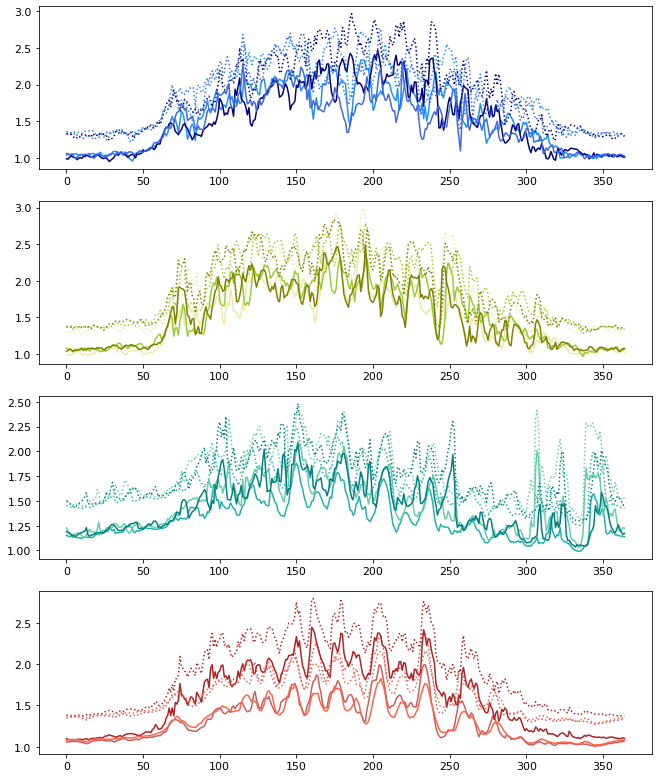

In [20]:
fact = 0.55
fig, axs = plt.subplots(4,1, figsize=(20*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(np.arange(0,365,1),PI8_surfOmA_means_cs3, color = cs3_col,linestyle = ':')
axs[0].plot(np.arange(0,365,1),BR3_surfOmA_means_cs3, color = cs3_col,linestyle = '-')
axs[0].plot(np.arange(0,365,1),PI8_surfOmA_means_cs2, color = cs2_col,linestyle = ':')
axs[0].plot(np.arange(0,365,1),BR3_surfOmA_means_cs2, color = cs2_col,linestyle = '-')
axs[0].plot(np.arange(0,365,1),PI8_surfOmA_means_cs, color = cs_col,linestyle = ':')
axs[0].plot(np.arange(0,365,1),BR3_surfOmA_means_cs, color = cs_col,linestyle = '-')
#
axs[1].plot(np.arange(0,365,1),PI8_surfOmA_means_ns3, color = ns3_col,linestyle = ':')
axs[1].plot(np.arange(0,365,1),BR3_surfOmA_means_ns3, color = ns3_col,linestyle = '-')
axs[1].plot(np.arange(0,365,1),PI8_surfOmA_means_ns2, color = ns2_col,linestyle = ':')
axs[1].plot(np.arange(0,365,1),BR3_surfOmA_means_ns2, color = ns2_col,linestyle = '-')
axs[1].plot(np.arange(0,365,1),PI8_surfOmA_means_ns, color = ns_col,linestyle = ':')
axs[1].plot(np.arange(0,365,1),BR3_surfOmA_means_ns, color = ns_col,linestyle = '-')

axs[2].plot(np.arange(0,365,1),PI8_surfOmA_means_jdf3, color = jdf3_col,linestyle = ':')
axs[2].plot(np.arange(0,365,1),BR3_surfOmA_means_jdf3, color = jdf3_col,linestyle = '-')
axs[2].plot(np.arange(0,365,1),PI8_surfOmA_means_jdf2, color = jdf2_col,linestyle = ':')
axs[2].plot(np.arange(0,365,1),BR3_surfOmA_means_jdf2, color = jdf2_col,linestyle = '-')
axs[2].plot(np.arange(0,365,1),PI8_surfOmA_means_jdf, color = jdf_col,linestyle = ':')
axs[2].plot(np.arange(0,365,1),BR3_surfOmA_means_jdf, color = jdf_col,linestyle = '-')

axs[3].plot(np.arange(0,365,1),PI8_surfOmA_means_haro3, color = haro3_col,linestyle = ':')
axs[3].plot(np.arange(0,365,1),BR3_surfOmA_means_haro3, color = haro3_col,linestyle = '-')
axs[3].plot(np.arange(0,365,1),PI8_surfOmA_means_haro2, color = haro2_col,linestyle = ':')
axs[3].plot(np.arange(0,365,1),BR3_surfOmA_means_haro2, color = haro2_col,linestyle = '-')
axs[3].plot(np.arange(0,365,1),PI8_surfOmA_means_haro, color = haro_col,linestyle = ':')
axs[3].plot(np.arange(0,365,1),BR3_surfOmA_means_haro, color = haro_col,linestyle = '-')

for i in range(0,4):
    axs[i].set_xlim()

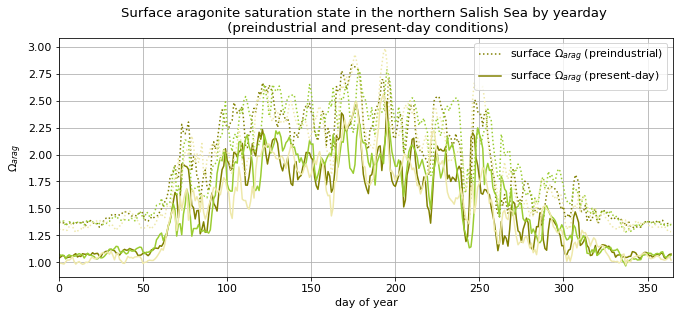

In [33]:
fact = 0.55
fig, axs = plt.subplots(1,1, figsize=(20*fact, 8*fact), facecolor='w', edgecolor='k')

axs.plot(np.arange(0,365,1),PI8_surfOmA_means_ns, color = ns_col,linestyle = ':', label = 'surface $\Omega_{arag}$ (preindustrial)')
axs.plot(np.arange(0,365,1),BR3_surfOmA_means_ns, color = ns_col,linestyle = '-',\
         label = 'surface $\Omega_{arag}$ (present-day)')
axs.plot(np.arange(0,365,1),PI8_surfOmA_means_ns2, color = ns2_col,linestyle = ':')
axs.plot(np.arange(0,365,1),BR3_surfOmA_means_ns2, color = ns2_col,linestyle = '-')
axs.plot(np.arange(0,365,1),PI8_surfOmA_means_ns3, color = ns3_col,linestyle = ':')
axs.plot(np.arange(0,365,1),BR3_surfOmA_means_ns3, color = ns3_col,linestyle = '-')
axs.set_title('Surface aragonite saturation state in the northern Salish Sea by yearday \n (preindustrial and present-day conditions)')
axs.set_xlim([0,365])
axs.set_xlabel('day of year')
axs.set_ylabel('$\Omega_{arag}$')
axs.grid()
axs.legend(loc = 1)

In [34]:
print('haro3')
print(f'BR: {np.size(BR3_surfOmA_means_haro3[BR3_surfOmA_means_haro3<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_haro3[PI8_surfOmA_means_haro3<1.1])/365}')
print('haro2')
print(f'BR: {np.size(BR3_surfOmA_means_haro2[BR3_surfOmA_means_haro2<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_haro2[PI8_surfOmA_means_haro2<1.1])/365}')
print('haro')
print(f'BR: {np.size(BR3_surfOmA_means_haro[BR3_surfOmA_means_haro<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_haro[PI8_surfOmA_means_haro<1.1])/365}')
print('')
print('cs3')
print(f'BR: {np.size(BR3_surfOmA_means_cs3[BR3_surfOmA_means_cs3<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_cs3[PI8_surfOmA_means_cs3<1.1])/365}')
print('cs2')
print(f'BR: {np.size(BR3_surfOmA_means_cs2[BR3_surfOmA_means_cs2<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_cs2[PI8_surfOmA_means_cs2<1.1])/365}')
print('cs')
print(f'BR: {np.size(BR3_surfOmA_means_cs[BR3_surfOmA_means_cs<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_cs[PI8_surfOmA_means_cs<1.1])/365}')
print('')
print('jdf3')
print(f'BR: {np.size(BR3_surfOmA_means_jdf3[BR3_surfOmA_means_jdf3<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_jdf3[PI8_surfOmA_means_jdf3<1.1])/365}')
print('jdf2')
print(f'BR: {np.size(BR3_surfOmA_means_jdf2[BR3_surfOmA_means_jdf2<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_jdf2[PI8_surfOmA_means_jdf2<1.1])/365}')
print('jdf')
print(f'BR: {np.size(BR3_surfOmA_means_jdf[BR3_surfOmA_means_jdf<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_jdf[PI8_surfOmA_means_jdf<1.1])/365}')
print('')
print('ns3')
print(f'BR: {np.size(BR3_surfOmA_means_ns3[BR3_surfOmA_means_ns3<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns3[PI8_surfOmA_means_ns3<1.1])/365}')
print('ns2')
print(f'BR: {np.size(BR3_surfOmA_means_ns2[BR3_surfOmA_means_ns2<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns2[PI8_surfOmA_means_ns2<1.1])/365}')
print('ns')
print(f'BR: {np.size(BR3_surfOmA_means_ns[BR3_surfOmA_means_ns<1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns[PI8_surfOmA_means_ns<1.1])/365}')
print('')

print('ns4')
print(f'BR: {np.size(BR3_surfOmA_means_ns4[BR3_surfOmA_means_ns4<1.0])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns4[PI8_surfOmA_means_ns4<1.0])/365}')

haro3
BR: 0.3287671232876712
PI: 0.0
haro2
BR: 0.052054794520547946
PI: 0.0
haro
BR: 0.2876712328767123
PI: 0.0

cs3
BR: 0.26575342465753427
PI: 0.0
cs2
BR: 0.2684931506849315
PI: 0.0
cs
BR: 0.27671232876712326
PI: 0.0

jdf3
BR: 0.11232876712328767
PI: 0.0
jdf2
BR: 0.0136986301369863
PI: 0.0
jdf
BR: 0.04657534246575343
PI: 0.0

ns3
BR: 0.29315068493150687
PI: 0.0
ns2
BR: 0.2136986301369863
PI: 0.0
ns
BR: 0.2273972602739726
PI: 0.0

ns4
BR: 0.019178082191780823
PI: 0.0


In [38]:
print('ns4')
print(f'BR: {np.size(BR3_surfOmA_means_ns4[BR3_surfOmA_means_ns4>1.7])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns4[PI8_surfOmA_means_ns4>1.7])/365}')
print('ns4')
print(f'BR: {np.size(BR3_surfOmA_means_ns4[BR3_surfOmA_means_ns4>1.0])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns4[PI8_surfOmA_means_ns4>1.0])/365}')
print('ns4')
print(f'BR: {np.size(BR3_surfOmA_means_ns4[BR3_surfOmA_means_ns4>1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns4[PI8_surfOmA_means_ns4>1.1])/365}')

print(f'BR: {np.size(BR3_surfOmA_means_ns3[BR3_surfOmA_means_ns3>1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns3[PI8_surfOmA_means_ns3>1.1])/365}')


print(f'BR: {np.size(BR3_surfOmA_means_ns3[BR3_surfOmA_means_ns>1.1])/365}')
print(f'PI: {np.size(PI8_surfOmA_means_ns3[PI8_surfOmA_means_ns>1.1])/365}')

ns4
BR: 0.32602739726027397
PI: 0.5232876712328767
ns4
BR: 0.9808219178082191
PI: 1.0
ns4
BR: 0.7616438356164383
PI: 1.0
BR: 0.7068493150684931
PI: 1.0
BR: 0.7726027397260274
PI: 1.0
